# 1.Import all relevant Libraries

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, explained_variance_score

# 2.Load Dataset

In [216]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [217]:
df = pd.concat([train_df, test_df], axis=0)

In [218]:
print(df.shape)
df.head()

(2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# 3.Exploratory Data Analysis

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [220]:
cols_keep = df.columns[df.notnull().sum() >= 2700]

In [221]:
cols_keep.shape

(73,)

In [222]:
cols_keep = cols_keep.append(pd.Index(['SalePrice']))

In [223]:
df = df[cols_keep]

In [224]:
print(df.shape)
df.info()

(2919, 74)
<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  Ye

In [225]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [226]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,1
SaleCondition,0


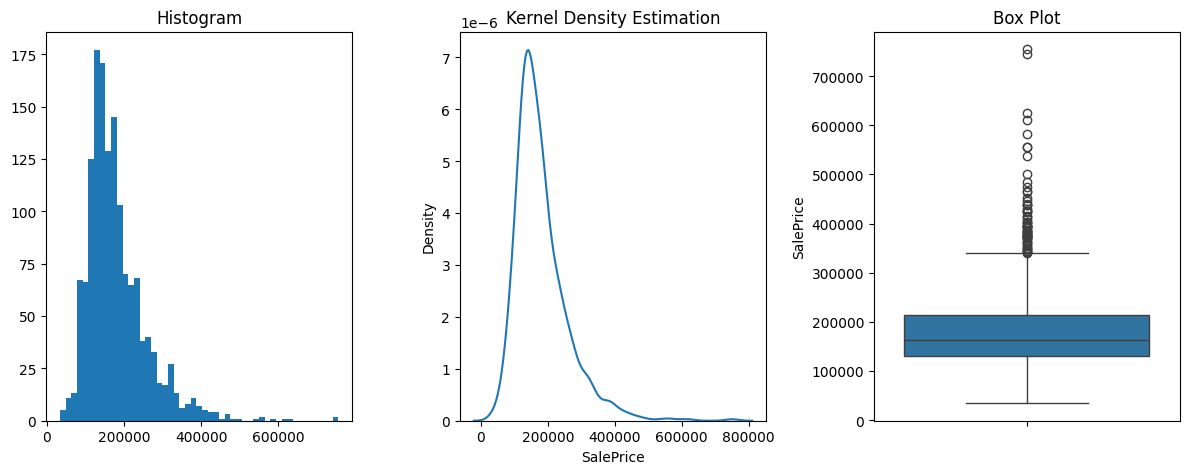

In [227]:
fig, axes = plt.subplots(1,3, figsize=(12,5))
axes[0].hist(df['SalePrice'], bins='auto')
axes[0].set_title('Histogram')

sns.kdeplot(df['SalePrice'], ax=axes[1])
axes[1].set_title('Kernel Density Estimation')

sns.boxplot(df['SalePrice'], ax=axes[2])
axes[2].set_title('Box Plot')

plt.tight_layout()
plt.show()

# 3.Data Preprocessing

## 3.1 Imputing Missing Values

In [228]:
missing_cols = df.columns[df.isnull().any()]

In [229]:
missing_df = df[missing_cols]

In [230]:
df.drop(columns=missing_cols,inplace=True)

In [231]:
missing_df.columns

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType', 'SalePrice'],
      dtype='object')

In [232]:
numerical_df = missing_df.select_dtypes(include=np.number)
categorical_df = missing_df.select_dtypes(exclude=np.number)

### 3.11 Imputing Numerical Values

In [233]:
append = numerical_df['SalePrice']
numerical_df.drop(columns=['SalePrice'],axis=0,inplace=True)
numerical_df.columns

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [234]:
numerical_df.isnull().sum()

,0
MasVnrArea,23
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFullBath,2
BsmtHalfBath,2
GarageYrBlt,159
GarageCars,1
GarageArea,1


<Axes: xlabel='GarageYrBlt', ylabel='Density'>

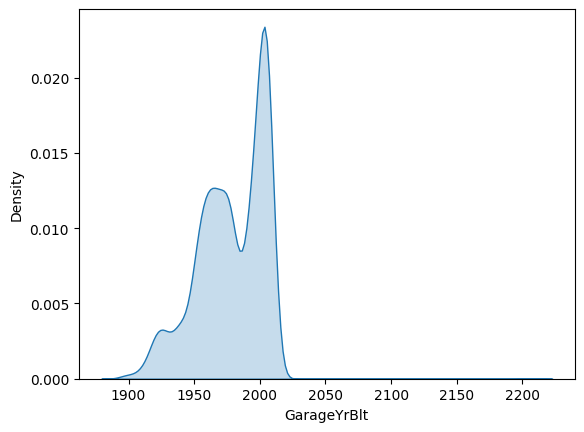

In [235]:
sns.kdeplot(numerical_df['GarageYrBlt'], shade=True)

The probability distribution for GarageYrBlt is right-skewed. We'll replace the missing values with median here.

In [236]:
numerical_df['GarageYrBlt'].fillna(numerical_df['GarageYrBlt'].median(),inplace=True)

In [237]:
numerical_df.fillna(numerical_df.mean(),inplace=True)

In [238]:
numerical_df = pd.concat([numerical_df,append],axis=1)

In [239]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrArea    2919 non-null   float64
 1   BsmtFinSF1    2919 non-null   float64
 2   BsmtFinSF2    2919 non-null   float64
 3   BsmtUnfSF     2919 non-null   float64
 4   TotalBsmtSF   2919 non-null   float64
 5   BsmtFullBath  2919 non-null   float64
 6   BsmtHalfBath  2919 non-null   float64
 7   GarageYrBlt   2919 non-null   float64
 8   GarageCars    2919 non-null   float64
 9   GarageArea    2919 non-null   float64
 10  SalePrice     1460 non-null   float64
dtypes: float64(11)
memory usage: 273.7 KB


### 3.12 Imputing Categorical Values

In [240]:
categorical_df.columns

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [241]:
categorical_df.isnull().sum()

,0
MSZoning,4
Utilities,2
Exterior1st,1
Exterior2nd,1
BsmtQual,81
BsmtCond,82
BsmtExposure,82
BsmtFinType1,79
BsmtFinType2,80
Electrical,1


In [242]:
# Get columns with missing values between 70 and 90
exclude_col1 = categorical_df.columns[(categorical_df.isnull().sum() > 70) & (categorical_df.isnull().sum() < 90)]

# Get columns with missing values greater than 90
exclude_col2 = categorical_df.columns[categorical_df.isnull().sum() > 90]

# Output results
print("Columns with 70-90% missing values:", exclude_col1)
print("Columns with more than 90% missing values:", exclude_col2)

exclude_df1 = categorical_df[exclude_col1]
exclude_df2 = categorical_df[exclude_col2]

cols_drop = exclude_col1.tolist() + exclude_col2.tolist()

categorical_df.drop(columns=cols_drop,inplace=True)

Columns with 70-90% missing values: Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')
Columns with more than 90% missing values: Index(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')


In [243]:
# Fill missing values with the mode of each column
for column in categorical_df.columns:
    mode_value = categorical_df[column].mode()[0]  # Get the first mode (most common value)
    categorical_df[column].fillna(mode_value, inplace=True)

TODO: check Imputer class from sklearn

In [244]:
categorical_df.isnull().sum()

,0
MSZoning,0
Utilities,0
Exterior1st,0
Exterior2nd,0
Electrical,0
KitchenQual,0
Functional,0
SaleType,0


In [245]:
def plot_categorical_distributions(df):
    # Iterate through the categorical columns
    for column in df.select_dtypes(include=['object', 'category']).columns:
        try:
            plt.figure(figsize=(5, 2))

            # Get value counts and sort
            value_counts = df[column].value_counts()

            # Create the plot
            sns.barplot(x=value_counts.index, y=value_counts.values, palette='Set2')

            plt.ylabel('Count')
            plt.xlabel(column)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error plotting {column}: {str(e)}")
            continue


def show_unique_values(df):
    unique_values = {}
    for column in df.columns:

        unique_vals = df[column].unique()
        unique_values[column] = unique_vals
        print(f"Column '{column}' has {len(unique_vals)} unique values: {unique_vals}\n")
    return unique_values


In [246]:
print(show_unique_values(exclude_df1),'\n')
print('\n',show_unique_values(exclude_df2))

Column 'BsmtQual' has 5 unique values: ['Gd' 'TA' 'Ex' nan 'Fa']

Column 'BsmtCond' has 5 unique values: ['TA' 'Gd' nan 'Fa' 'Po']

Column 'BsmtExposure' has 5 unique values: ['No' 'Gd' 'Mn' 'Av' nan]

Column 'BsmtFinType1' has 7 unique values: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

Column 'BsmtFinType2' has 7 unique values: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

{'BsmtQual': array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object), 'BsmtCond': array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object), 'BsmtExposure': array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object), 'BsmtFinType1': array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object), 'BsmtFinType2': array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)} 

Column 'GarageType' has 7 unique values: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

Column 'GarageFinish' has 4 unique values: ['RFn' 'Unf' 'Fin' nan]

Column 'GarageQual' has 6 unique values: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

Column 'G

In [247]:
exclude_df1.nunique()

,0
BsmtQual,4
BsmtCond,4
BsmtExposure,4
BsmtFinType1,6
BsmtFinType2,6


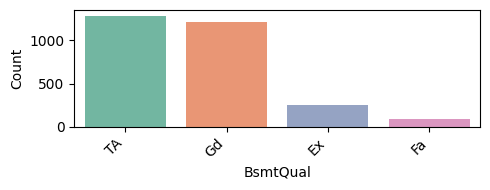

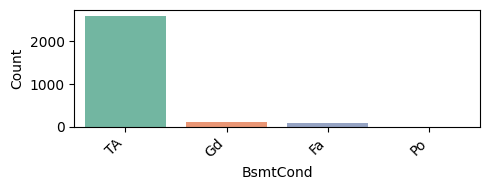

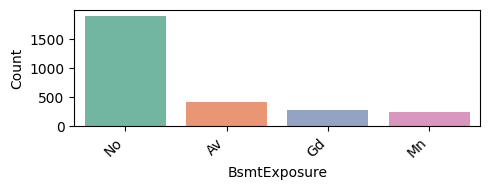

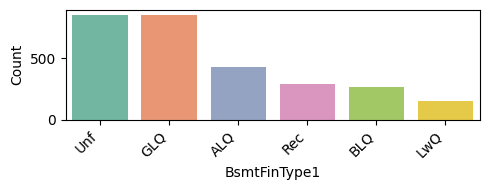

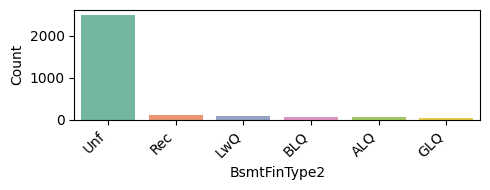

In [248]:
plot_categorical_distributions(exclude_df1)

In [249]:
# Fill missing values with the mode of each column
for column in exclude_df1.columns:
    mode_value = exclude_df1[column].mode()[0]  # Get the first mode (most common value)
    exclude_df1[column].fillna(mode_value, inplace=True)

TODO: check imputer class from sklearn, or find if there is a more efficient way to do this.

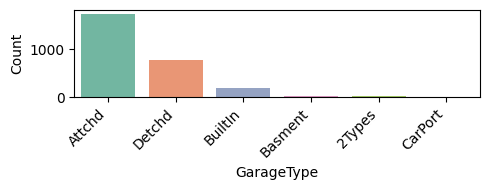

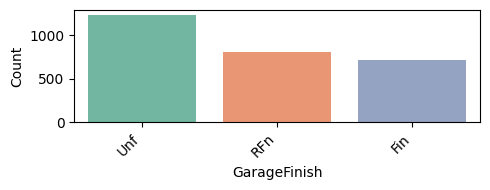

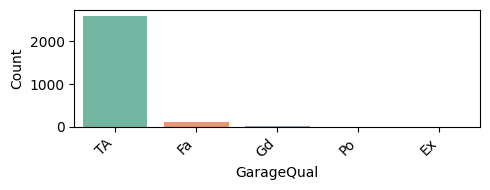

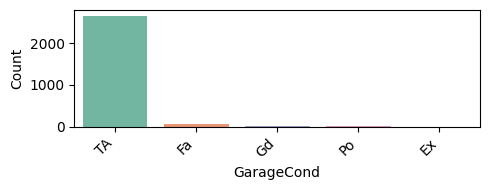

In [250]:
plot_categorical_distributions(exclude_df2)

In [251]:
exclude_df2.fillna('Missing', inplace=True)

In [252]:
exclude_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageType    2919 non-null   object
 1   GarageFinish  2919 non-null   object
 2   GarageQual    2919 non-null   object
 3   GarageCond    2919 non-null   object
dtypes: object(4)
memory usage: 114.0+ KB


In [253]:
categorical_df = pd.concat([categorical_df,exclude_df1,exclude_df2],axis=1)

In [254]:
categorical_df.columns

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical',
       'KitchenQual', 'Functional', 'SaleType', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [255]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      2919 non-null   object
 1   Utilities     2919 non-null   object
 2   Exterior1st   2919 non-null   object
 3   Exterior2nd   2919 non-null   object
 4   Electrical    2919 non-null   object
 5   KitchenQual   2919 non-null   object
 6   Functional    2919 non-null   object
 7   SaleType      2919 non-null   object
 8   BsmtQual      2919 non-null   object
 9   BsmtCond      2919 non-null   object
 10  BsmtExposure  2919 non-null   object
 11  BsmtFinType1  2919 non-null   object
 12  BsmtFinType2  2919 non-null   object
 13  GarageType    2919 non-null   object
 14  GarageFinish  2919 non-null   object
 15  GarageQual    2919 non-null   object
 16  GarageCond    2919 non-null   object
dtypes: object(17)
memory usage: 410.5+ KB


### 3.13 Concat Numerical and Categorical Columns back into df

In [256]:
df = pd.concat([df,categorical_df,numerical_df],axis=1)

In [257]:
print('\n',categorical_df.shape)
print('\n',numerical_df.shape)
print('\n',df.shape)


 (2919, 17)

 (2919, 11)

 (2919, 74)


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   LotConfig      2919 non-null   object 
 7   LandSlope      2919 non-null   object 
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  Condition2     2919 non-null   object 
 11  BldgType       2919 non-null   object 
 12  HouseStyle     2919 non-null   object 
 13  OverallQual    2919 non-null   int64  
 14  OverallCond    2919 non-null   int64  
 15  YearBuilt      2919 non-null   int64  
 16  YearRemodAdd   2919 non-null   int64  
 17  RoofStyle      2919 non-null   object 
 18  RoofMatl     

In [259]:
df.duplicated().sum()

0

## 3.3 Outlier Detection

In [260]:
print("Shape with outliers: ", df.shape)

Shape with outliers:  (2919, 74)


<Axes: ylabel='SalePrice'>

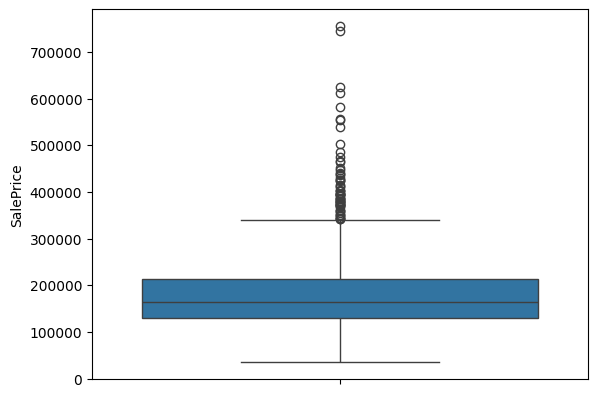

In [261]:
sns.boxplot(df['SalePrice'])

In [262]:
# IQR
# Calculate the upper and lower limits
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['SalePrice'] >= upper)[0]
lower_array = np.where(df['SalePrice'] <= lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (2797, 74)


<Axes: ylabel='SalePrice'>

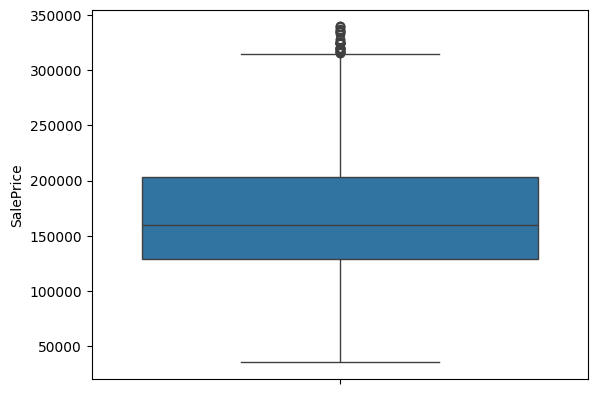

In [263]:
sns.boxplot(df['SalePrice'])

## 3.4 Scaling

In [287]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define target column and categorical columns
target_column = 'SalePrice'
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 1: Drop the target column and categorical columns
numerical_df = df.drop(columns=[target_column] + categorical_columns)

# Step 2: Normalize or Standardize
# Normalization
min_max_scaler = MinMaxScaler()
normalized_features = min_max_scaler.fit_transform(numerical_df)

# Standardization
standard_scaler = StandardScaler()
standardized_features = standard_scaler.fit_transform(numerical_df)

# Convert normalized and standardized features back to DataFrames
normalized_df = pd.DataFrame(normalized_features, columns=numerical_df.columns)
standardized_df = pd.DataFrame(standardized_features, columns=numerical_df.columns)

# Step 3: Concatenate the target column and categorical columns back
# Extract target column and categorical columns
target_df = df[[target_column]].reset_index(drop=True)
categorical_df = df[categorical_columns].reset_index(drop=True)

# Display the resulting DataFrames
print("Normalized Combined DataFrame:")
print(normalized_df.head())
print(normalized_df.shape)

print("\nStandardized Combined DataFrame:")
print(standardized_df.head())
print(standardized_df.shape)

Normalized Combined DataFrame:
         Id  MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
0  0.000000    0.235294  0.043768     0.666667        0.500   0.949275   
1  0.000343    0.000000  0.050808     0.555556        0.875   0.753623   
2  0.000685    0.235294  0.060908     0.666667        0.500   0.934783   
3  0.001028    0.294118  0.050502     0.666667        0.500   0.311594   
4  0.001371    0.235294  0.079334     0.777778        0.500   0.927536   

   YearRemodAdd  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  MasVnrArea  \
0      0.883333  0.109641  0.458647           0.0  ...     0.12250   
1      0.433333  0.194917  0.000000           0.0  ...     0.00000   
2      0.866667  0.123083  0.465091           0.0  ...     0.10125   
3      0.333333  0.131695  0.406015           0.0  ...     0.00000   
4      0.833333  0.170342  0.565521           0.0  ...     0.21875   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  \
0    0.125089         

## 3.5 Convert Categorical columns using OHE

In [276]:
categorical_cols = df.select_dtypes(include=['object','category']).columns
print(categorical_cols.shape)

categorical_cols = pd.get_dummies(df[categorical_cols],drop_first=True)

print(categorical_cols.shape)

(37,)
(2797, 197)


In [288]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2797 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2797 non-null   int64  
 1   MSSubClass     2797 non-null   int64  
 2   LotArea        2797 non-null   int64  
 3   OverallQual    2797 non-null   int64  
 4   OverallCond    2797 non-null   int64  
 5   YearBuilt      2797 non-null   int64  
 6   YearRemodAdd   2797 non-null   int64  
 7   1stFlrSF       2797 non-null   int64  
 8   2ndFlrSF       2797 non-null   int64  
 9   LowQualFinSF   2797 non-null   int64  
 10  GrLivArea      2797 non-null   int64  
 11  FullBath       2797 non-null   int64  
 12  HalfBath       2797 non-null   int64  
 13  BedroomAbvGr   2797 non-null   int64  
 14  KitchenAbvGr   2797 non-null   int64  
 15  TotRmsAbvGrd   2797 non-null   int64  
 16  Fireplaces     2797 non-null   int64  
 17  WoodDeckSF     2797 non-null   int64  
 18  OpenPorchSF  

In [289]:
# Reset the index of the DataFrames
normalized_df.reset_index(drop=True, inplace=True)
standardized_df.reset_index(drop=True, inplace=True)
categorical_cols.reset_index(drop=True, inplace=True)

# Now concatenate the DataFrames
df1 = pd.concat([normalized_df, categorical_cols,target_df], axis=1)
df2 = pd.concat([standardized_df, categorical_cols,target_df], axis=1)

# Check the resulting DataFrames
print("Concatenated DataFrame df1:")
print(df1.info())
print(df1.shape)

print("\nConcatenated DataFrame df2:")
print(df2.info())
print(df2.shape)

Concatenated DataFrame df1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Columns: 234 entries, Id to SalePrice
dtypes: bool(197), float64(37)
memory usage: 1.3 MB
None
(2797, 234)

Concatenated DataFrame df2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Columns: 234 entries, Id to SalePrice
dtypes: bool(197), float64(37)
memory usage: 1.3 MB
None
(2797, 234)


In [290]:
df2['SalePrice']

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
2792,NaN
2793,NaN
2794,NaN
2795,NaN


## 3.2 Feature Engineering

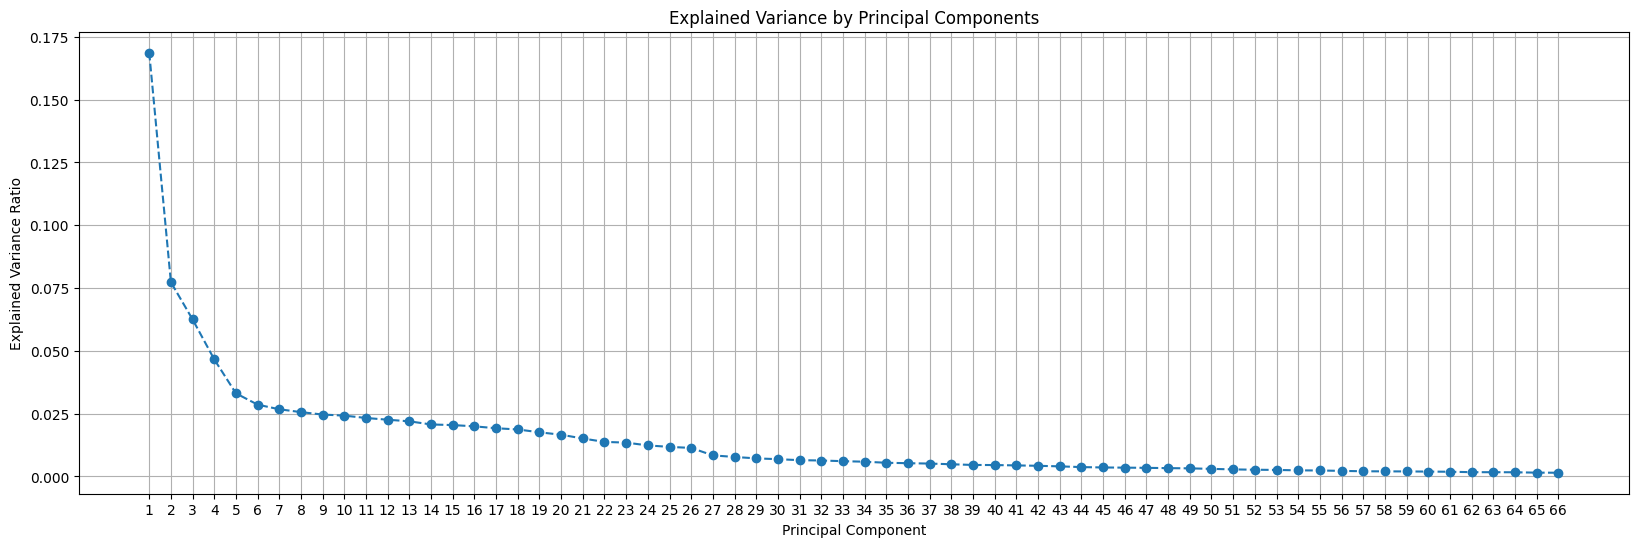

Original shape: (2797, 233)
Reduced shape: (2797, 66)


In [292]:
from sklearn.decomposition import PCA

# Step 1: Separate features and target if necessary
# If you have a target column, make sure to exclude it from the features
# For example, if 'SalePrice' is the target
features = df2.drop(columns=['SalePrice'])

# Step 2: Standardize the data, In my case I've already done it.

# Step 3: Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
principal_components = pca.fit_transform(features)

# Step 4: Convert to DataFrame
pca_df = pd.DataFrame(data=principal_components)

# Step 5: Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(20, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Optionally, print the shape of the new DataFrame
print("Original shape:", features.shape)
print("Reduced shape:", pca_df.shape)


## 3.5 Feature Selection

# 4.Predictive Modeling

## 4.1 Train Test Split

## 4.2 Model Training and Hyperparameter Tuning

## 4.3 Model Evaluation

# 5.Conclusion